# Finding the Optimal Time Window for Detecting RR Interval

Here we refer to the time window as the frame. Each frame is 0.033 sec front and back (so 0.67 total)

In [1]:
import numpy
import matplotlib.pyplot as plt
fps = 30.323427803

In [3]:
def readFromFile(fileName):
    l =numpy.loadtxt(fileName)
    return l[0], l[1], l[2]

In [4]:
def detectPeak(colorL, frameThreshold):
    peakL = list()
    colorlistLen = len(colorL)
    for i in range(1, colorlistLen-1):
        biggerThanPrevious = colorL[i] > colorL[i-1]
        biggerThanAfter = colorL[i] > colorL[i+1]
        #if it is a local maximum, then check if it is a RR peak by comparing its maxima interval to frameThreshold
        if biggerThanPrevious and biggerThanAfter:
            for k in range(2, frameThreshold+1):
                if i-k >= 0:
                    if not colorL[i] > colorL[i-k]:
                        #this is not a rr peak
                        break
                if i+k < colorlistLen:
                    if not colorL[i] > colorL[i+k]:
                        #this is not a rr peak
                        break
            else:
                #this IS a rr peak, store the array index
                peakL.append(i)
    return peakL

In [5]:
def constructRRIntervalList(peakL):
    return [ (peakL[i]-peakL[i-1])/fps for i in range(1, len(peakL))]

This function defines the criteria for being a true RR interval.

In [6]:
def isTrueRRInterval(rrInterval):
    if 0.54 <= rrInterval and rrInterval <= 1.0:
        return True
    else:
        return False

This function detect the amount of errors in a list of RR interval, as judged by function isTrueRRInterval

In [7]:
def getPercentError(rrL):
    errorNum = 0
    for rrInterval in rrL:
        if (not isTrueRRInterval(rrInterval)):
            errorNum += 1
    return 100.0*errorNum/len(rrL) if len(rrL) else 100

This function analyze the rgb txt file of a PPG video and return important information.

In [8]:
def analyzeVideoAndFindPercentErrorList(fileName):
    rErrorL = []
    gErrorL = []
    bErrorL = []
    rL, gL, bL = readFromFile(fileName)
    for frameThreshold in range(1, 26):
        rRRL = constructRRIntervalList(detectPeak(rL, frameThreshold))
        gRRL = constructRRIntervalList(detectPeak(gL, frameThreshold))
        bRRL = constructRRIntervalList(detectPeak(bL, frameThreshold))
        rErrorL.append(getPercentError(rRRL))
        gErrorL.append(getPercentError(gRRL))
        bErrorL.append(getPercentError(bRRL))
    return rErrorL, gErrorL, bErrorL

In [19]:
videoList = ["/home/mong/Desktop/map/map/videos/VID_20150123_172926_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173259_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173329_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173358_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173427_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173457_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173556_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173629_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173700_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173757_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_173028_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/VID_20150123_172857_Q.mp4.txt"]
videoList = ["/home/mong/Desktop/map/map/videos/160x120.VID_20150123_172926_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173259_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173329_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173358_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173427_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173457_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173556_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173629_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173700_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173757_Q.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_173028_F.mp4.txt",
    "/home/mong/Desktop/map/map/videos/160x120.VID_20150123_172857_Q.mp4.txt"]

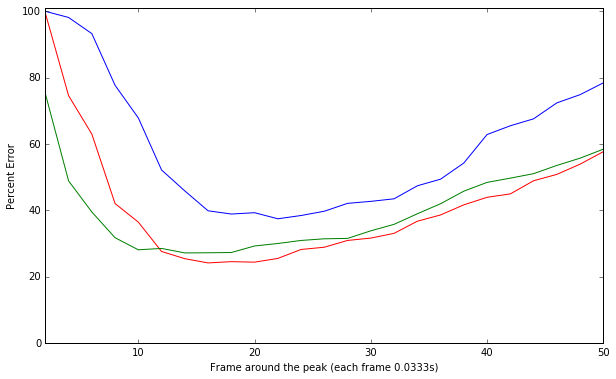

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
rAvgErrorL = [0 for i in range(0, 25)]
gAvgErrorL = [0 for i in range(0, 25)]
bAvgErrorL = [0 for i in range(0, 25)]
goodVideoL = {}
for video in videoList:
    rErrorL, gErrorL, bErrorL = analyzeVideoAndFindPercentErrorList(video)
    #find the errors less than .1
    for i in range(0, len(rErrorL)):
        if rErrorL[i] < 0.1:
            goodVideoL[video+"(red frame " + str((i+1)*2)+")"] = rErrorL[i]
    for i in range(0, len(gErrorL)):
        if gErrorL[i] < 0.1:
            goodVideoL[video+"(green frame " + str((i+1)*2)+")"] = gErrorL[i]
    for i in range(0, len(bErrorL)):
        if bErrorL[i] < 0.1:
            goodVideoL[video+"(blue frame " + str((i+1)*2)+")"] = bErrorL[i]
    for i in range(0, 25):
        rAvgErrorL[i] += rErrorL[i]
        gAvgErrorL[i] += gErrorL[i]
        bAvgErrorL[i] += bErrorL[i]
rAvgErrorL = [totalError/len(videoList) for totalError in rAvgErrorL]
gAvgErrorL = [totalError/len(videoList) for totalError in gAvgErrorL]
bAvgErrorL = [totalError/len(videoList) for totalError in bAvgErrorL]
frameThresholdL = [frameThreshold*2 for frameThreshold in range(1, 26)]
plt.plot(frameThresholdL, rAvgErrorL, color='red')
plt.plot(frameThresholdL, gAvgErrorL, color='green')
plt.plot(frameThresholdL, bAvgErrorL, color='blue')
plt.xlabel("Frame around the peak (each frame 0.0333s)")
plt.xlim(2, 50)
plt.ylim(0, 101)
plt.ylabel("Percent Error")
plt.show()

These are the good videos with percent errors less than 0.1

In [23]:
for goodVideo in goodVideoL:
    print (goodVideo.split("/")[-1], "with percent error of", goodVideoL[goodVideo])

160x120.VID_20150123_172926_F.mp4.txt(green frame 18) with percent error of 0.0
160x120.VID_20150123_172926_F.mp4.txt(green frame 14) with percent error of 0.0
160x120.VID_20150123_172926_F.mp4.txt(green frame 10) with percent error of 0.0
160x120.VID_20150123_172926_F.mp4.txt(green frame 12) with percent error of 0.0
160x120.VID_20150123_172926_F.mp4.txt(green frame 20) with percent error of 0.0
160x120.VID_20150123_172926_F.mp4.txt(green frame 16) with percent error of 0.0
160x120.VID_20150123_172926_F.mp4.txt(green frame 8) with percent error of 0.0


In [19]:
def minimum(l):
    minIndex = 0
    minimum = l[minIndex];
    for curIndex in range (1, len(l)):
        if l[curIndex] < l[minIndex]:
            minIndex = curIndex
            minimum = l[curIndex]
    return minimum, minIndex
rLowestErrorPercentage, rIndex = minimum(rAvgErrorL)
gLowestErrorPercentage, gIndex = minimum(gAvgErrorL)
bLowestErrorPercentage, bIndex = minimum(bAvgErrorL)
print("The ideal frame around and time around is as follow")
print("for red: {0:2d} which is {1:.3f} seconds".format((rIndex*2+2), (rIndex*2+2)/30))
print("for green: {0:2d} which is {1:.3f} seconds".format(gIndex*2+2, (gIndex*2+2)/30))
print("for blue: {0:2d} which is {1:.3f} seconds".format(bIndex*2+2, (bIndex*2+2)/30))


The ideal frame around and time around is as follow
for red: 14 which is 0.467 seconds
for green: 16 which is 0.533 seconds
for blue: 30 which is 1.000 seconds
